# <b>Análise Exploratória - Energia Solar</b>
---

# <div style='text-align: justify'>
Neste projeto, foi realizado uma análise exploratório sobre dados gerados a partir de uma planta de energia solar. 
# </div>
# <b>Importando os Dados</b>

---
#<div style='text-align: justify'>
Esses dados foram coletados em duas usinas de energia solar na Índia durante um período de 34 dias. Ele tem dois pares de arquivos sendo que cada par tem um conjunto de dados de geração de energia e um conjunto de dados de leitura do sensor. Os conjuntos de dados de geração de energia são reunidos no nível do inversor onde cada inversor possui várias linhas de painéis solares anexados a ele. Os dados do sensor são coletados no nível da planta. 
#</div>


In [ ]:
# Importação das bibliotecas 

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Carregamento dos arquivos
ds_plant_generation_1 = pd.read_csv('/content/drive/My Drive/Kaggle/SolarSystem/Plant_1_Generation_Data.csv')
ds_plant_weather_sensor_1 = pd.read_csv('/content/drive/My Drive/Kaggle/SolarSystem/Plant_1_Weather_Sensor_Data.csv')
#ds_plant_generation_2 = pd.read_csv('/content/drive/My Drive/Kaggle/SolarSystem/Plant_2_Generation_Data.csv')
#ds_plant_weather_sensor_2 = pd.read_csv('/content/drive/My Drive/Kaggle/SolarSystem/Plant_2_Weather_Sensor_Data.csv')


# Formatação de data e hora
ds_plant_generation_1['DATE_TIME'] = pd.to_datetime(ds_plant_generation_1['DATE_TIME'],format = '%d-%m-%Y %H:%M')
ds_plant_weather_sensor_1['DATE_TIME'] = pd.to_datetime(ds_plant_weather_sensor_1['DATE_TIME'],format = '%Y-%m-%d %H:%M')

# Separação da data e hora
ds_plant_generation_1['DATE'] = ds_plant_generation_1['DATE_TIME'].apply(lambda x:x.date())
ds_plant_generation_1['TIME'] = ds_plant_generation_1['DATE_TIME'].apply(lambda x:x.time())

ds_plant_weather_sensor_1['DATE'] = ds_plant_weather_sensor_1['DATE_TIME'].apply(lambda x:x.date())
ds_plant_weather_sensor_1['TIME'] = ds_plant_weather_sensor_1['DATE_TIME'].apply(lambda x:x.time())

# Adicionado o formato da data
ds_plant_generation_1['DATE'] = pd.to_datetime(ds_plant_generation_1['DATE'],format = '%Y-%m-%d')
ds_plant_weather_sensor_1['DATE'] = pd.to_datetime(ds_plant_weather_sensor_1['DATE'],format = '%Y-%m-%d')

# Separação de hora e minuto
ds_plant_generation_1['HOUR'] = pd.to_datetime(ds_plant_generation_1['TIME'],format='%H:%M:%S').dt.hour
ds_plant_generation_1['MINUTES'] = pd.to_datetime(ds_plant_generation_1['TIME'],format='%H:%M:%S').dt.minute

# Adicionado o formato de hora
ds_plant_weather_sensor_1['HOUR'] = pd.to_datetime(ds_plant_weather_sensor_1['TIME'],format='%H:%M:%S').dt.hour
ds_plant_weather_sensor_1['MINUTES'] = pd.to_datetime(ds_plant_weather_sensor_1['TIME'],format='%H:%M:%S').dt.minute

In [ ]:
# Verificamos as informações das colunas do dataset da geração de energia
ds_plant_generation_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
 7   DATE         68778 non-null  datetime64[ns]
 8   TIME         68778 non-null  object        
 9   HOUR         68778 non-null  int64         
 10  MINUTES      68778 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 5.8+ MB


In [ ]:
# Verificamos as informações das colunas do dataset do sensor
ds_plant_weather_sensor_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
 6   DATE                 3182 non-null   datetime64[ns]
 7   TIME                 3182 non-null   object        
 8   HOUR                 3182 non-null   int64         
 9   MINUTES              3182 non-null   int64         
dtypes: datetime64[ns](2), float64(3), int64(3), object(2)
memory usage: 248.7+ KB


In [ ]:
# Verificamos informações descritivas do dataset
ds_plant_generation_1.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,HOUR,MINUTES
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04,68778.000000,68778.000000
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06,11.567216,22.489313
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05,6.862477,16.772774
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06,0.000000,0.000000
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06,6.000000,0.000000
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06,12.000000,15.000000
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06,17.000000,30.000000
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06,23.000000,45.000000


In [ ]:
# Verificamos informações descritivas do dataset
ds_plant_weather_sensor_1.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR,MINUTES
count,3182.0,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313,11.614708,22.500000
std,0.0,3.354856,12.261222,0.300836,6.904059,16.768928
min,4135001.0,20.398505,18.140415,0.000000,0.000000,0.000000
25%,4135001.0,22.705182,21.090553,0.000000,6.000000,15.000000
50%,4135001.0,24.613814,24.618060,0.024653,12.000000,22.500000
75%,4135001.0,27.920532,41.307840,0.449588,18.000000,30.000000
max,4135001.0,35.252486,65.545714,1.221652,23.000000,45.000000


**Gráfico Boxplot**

Selecionamos um gráfico do tipo Boxplot para visualizar a distribuição da temperatura do modulo para a planta. O motivo da escolha deste gráfico é justamente para analisar se ocorreu algum pico da temperatura, seja mínimo ou máximo. 

Por exemplo, na serie 'MODULE_TEMPERATURE' poderiamos adicionar um valor alto 
para então visualizar no gráfico esse outlier. Por exemplo, adicionado à série um novo valor:
- ds_plant_weather_sensor_1['MODULE_TEMPERATURE'].append(pd.Series([80]))

[Text(0, 0.5, 'Ambient Temperature'), Text(0.5, 0, 'Plant ID')]

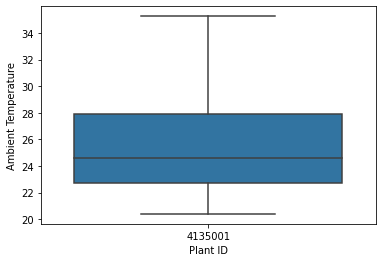

In [ ]:
sns.boxplot(x=ds_plant_weather_sensor_1['PLANT_ID'], y=ds_plant_weather_sensor_1['AMBIENT_TEMPERATURE'], orient='v').set(xlabel='Plant ID', ylabel='Ambient Temperature')

[Text(0, 0.5, 'Module Temperature'), Text(0.5, 0, 'Plant ID')]

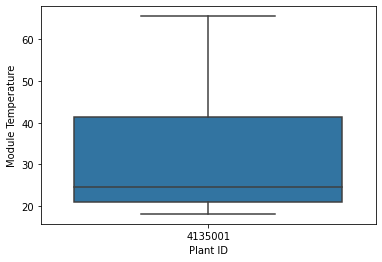

In [ ]:
module_temperature = ds_plant_weather_sensor_1['MODULE_TEMPERATURE']
sns.boxplot(x=ds_plant_weather_sensor_1['PLANT_ID'], y=module_temperature, orient='v').set(xlabel='Plant ID', ylabel='Module Temperature')

**Gráfico de Calor**

Após a análise das temperaturas, ambiente e no módulo, foi aplicado uma coorelação de ambas sobre a variação em um dia de coleta de energia. Como pode ser notado, obtivemos as maiores temperaturas durante o meio dia e amenas durante a noite, o que nos indica que o lugar onde as placas estão instaladas, consiste em um clima tropical.

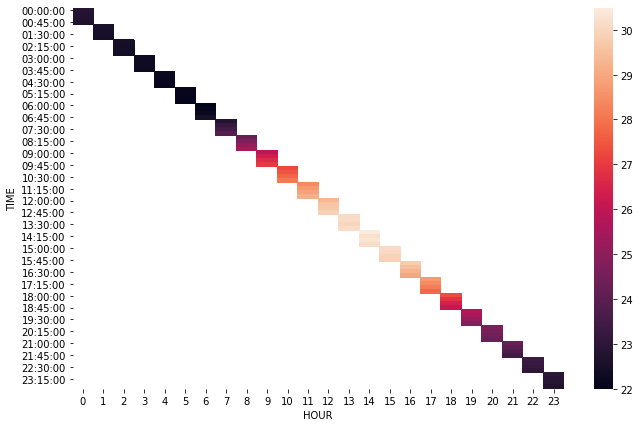

In [ ]:
temp_x_hour = ds_plant_weather_sensor_1.drop(['PLANT_ID', 'SOURCE_KEY', 'DATE_TIME', 'IRRADIATION'], axis=1)
temp_x_hour = pd.pivot_table(temp_x_hour, values='AMBIENT_TEMPERATURE', index=['TIME'], columns='HOUR')
f, ax = plt.subplots(figsize=(11,7))
sns.heatmap(temp_x_hour)

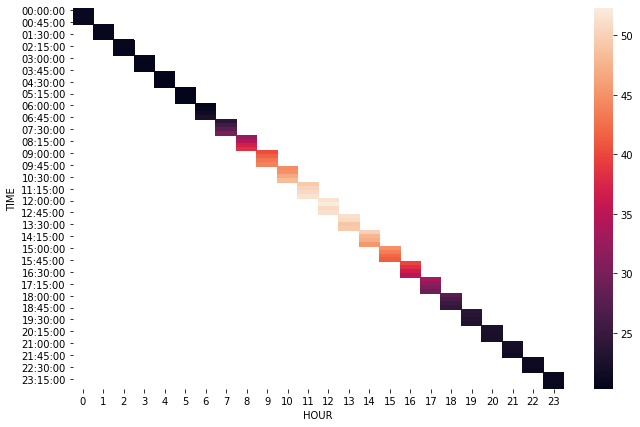

In [ ]:
temp_x_hour = ds_plant_weather_sensor_1.drop(['PLANT_ID', 'SOURCE_KEY', 'DATE_TIME', 'IRRADIATION'], axis=1)
temp_x_hour = pd.pivot_table(temp_x_hour, values='MODULE_TEMPERATURE', index=['TIME'], columns='HOUR')
f, ax = plt.subplots(figsize=(11,7))
sns.heatmap(temp_x_hour)

**Gráfico de Dispersão**

Tendo conhecimento que as maiores temperaturas registradas ocorreram entre 10 e 15 horas, aplicamos uma dispersão para obter a geração da corrente contínua e alternada no período, e como podemos observar, foi o que aconteceu. Entretanto, também podemos observar que o ganho não é fixo e que, muitas vezes, o horário citado, gerou menos energia que em outros horários. Isso nos diz que em alguns cenários, o clima iniciou aberto, com sol, porém com o passar do dia, fechou de nuvens.  



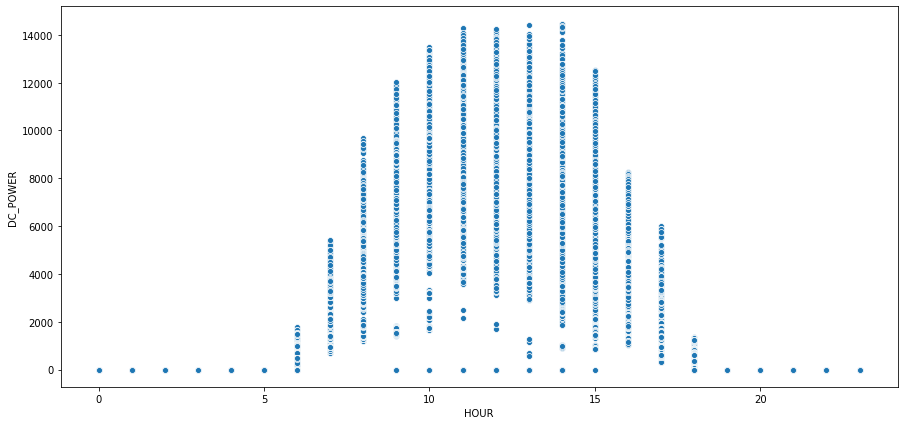

In [ ]:
f, ax = plt.subplots(figsize=(15,7))
sns.scatterplot(x=ds_plant_generation_1['HOUR'], y=ds_plant_generation_1['DC_POWER'])

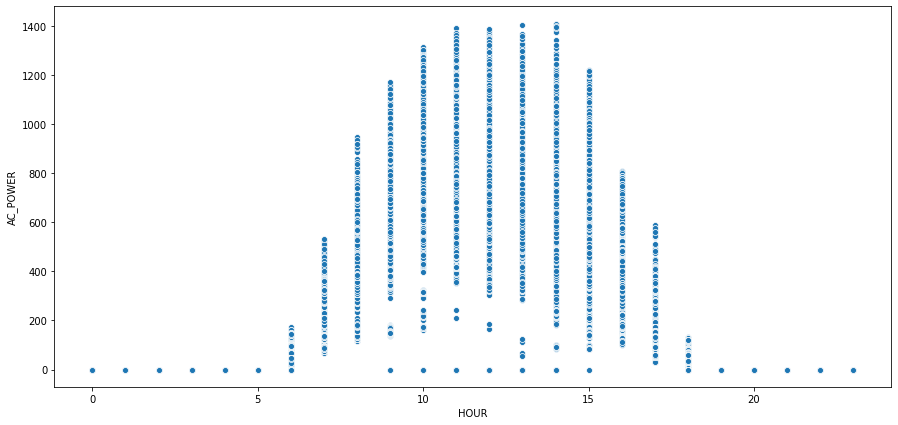

In [ ]:
f, ax = plt.subplots(figsize=(15,7))
sns.scatterplot(x=ds_plant_generation_1['HOUR'], y=ds_plant_generation_1['AC_POWER'])

**Gráfico de Linhas**

Utilizamos o gráfico de linhas para poder visualizar o ganho de energia com base no período de coleta dos dados, bem como o ganho de energia por hora.

Já para o segundo gráfico de linhas, apresentamos a relação de aumento de temperatura por ganho de energia.

(737560.0, 737593.0)

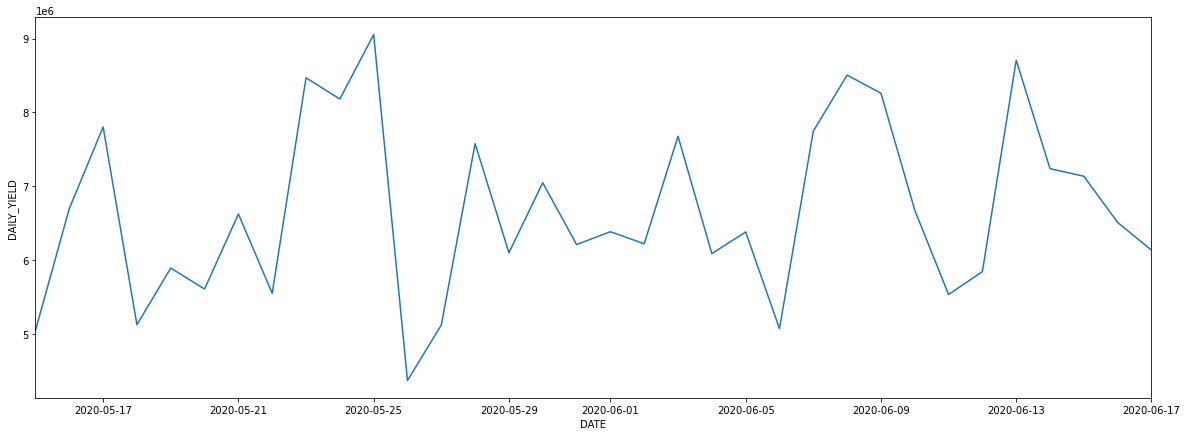

In [51]:
# x_dates = ds_plant_generation_1['DATE'].dt.strftime('%Y-%m-%d').sort_values().unique()
sum_daily_yield = ds_plant_generation_1.groupby(['DATE']).sum()
sum_daily_yield = sum_daily_yield.reset_index()
f, ax = plt.subplots(figsize=(20,7))
sns.lineplot(x='DATE', y='DAILY_YIELD', data=sum_daily_yield)
plt.xlim(sum_daily_yield['DATE'].iloc[0], sum_daily_yield['DATE'].iloc[-1])

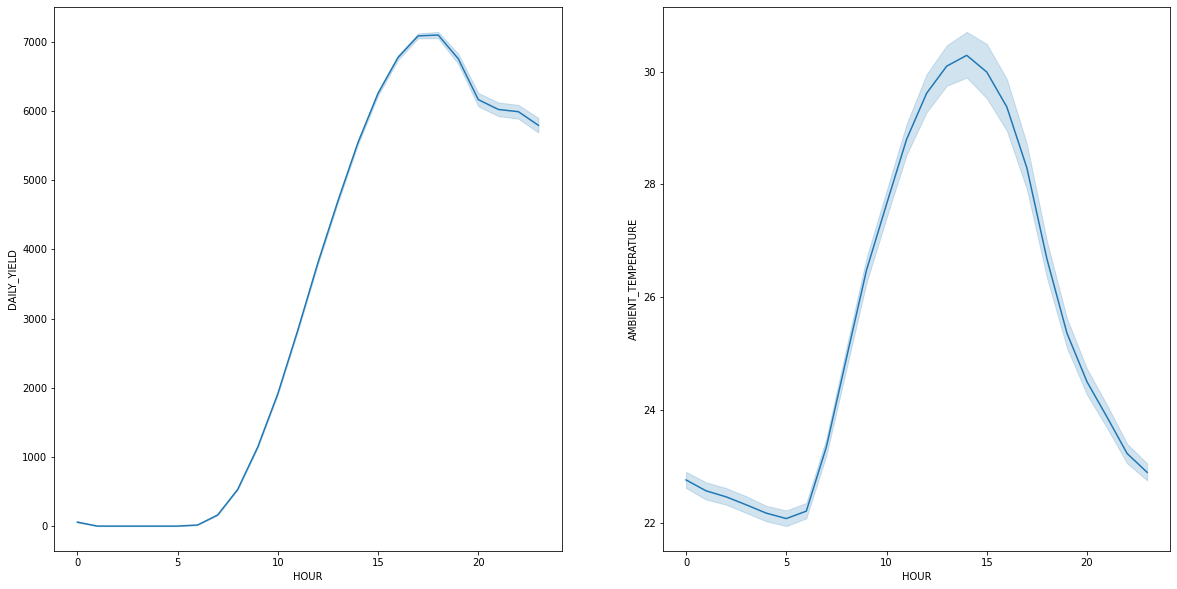

In [ ]:
df_merged = pd.concat([ds_plant_weather_sensor_1, ds_plant_generation_1])
plt.subplots(figsize=(20,10))
plt.subplot(1,2,1)
sns.lineplot(x="HOUR", y="DAILY_YIELD", data=ds_plant_generation_1)
plt.subplot(1,2,2)
sns.lineplot(x="HOUR", y="AMBIENT_TEMPERATURE", data=ds_plant_weather_sensor_1)

**Gráfico de Barras**

Para finalizar, apresentamos o ganho de corrente contínua e alternada no decorrer dos dias

<BarContainer object of 34 artists>

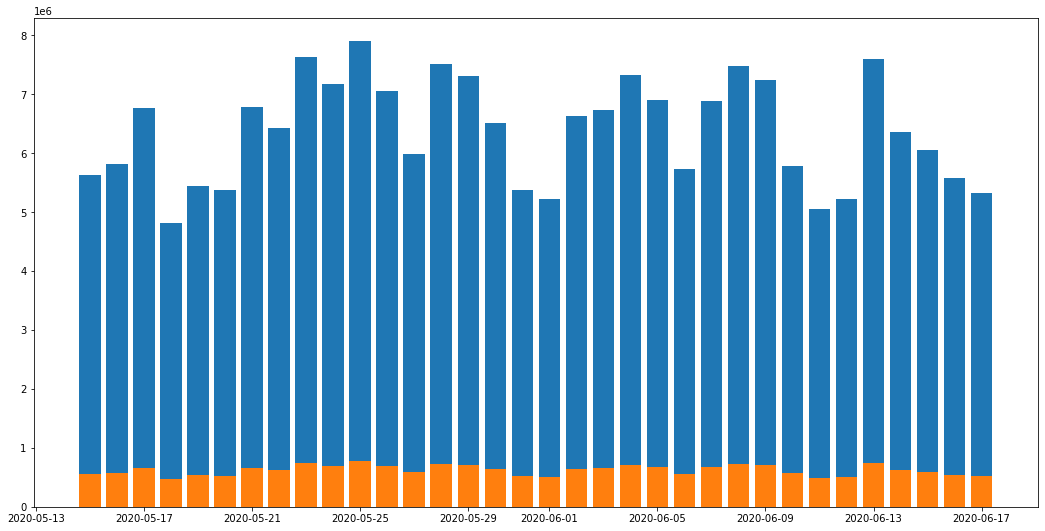

In [58]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.bar(sum_daily_yield.DATE,
        sum_daily_yield.DC_POWER,
        label='DC_POWER'
       )

ax.bar(sum_daily_yield.DATE,
        sum_daily_yield.AC_POWER,
        label='AC_POWER'
       )